In [1]:
import cv2 
import matplotlib.pyplot as plt

In [3]:
# reading image

img = cv2.imread("images/boyImage.jpeg")
img.shape

(563, 580, 3)

563 rows, 580 columns, 3 rgb color

In [4]:
# [0][0] pixel color
img[0][0]

array([255, 255, 255], dtype=uint8)

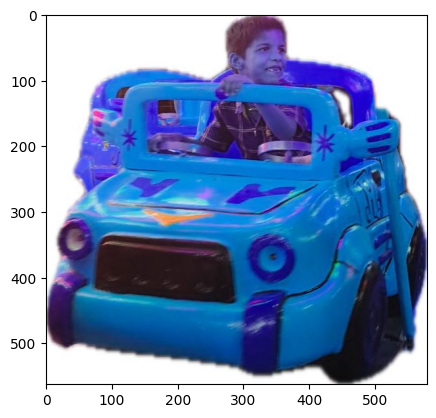

In [5]:
# show image (defult reading BGR order)
plt.imshow(img)
plt.show()

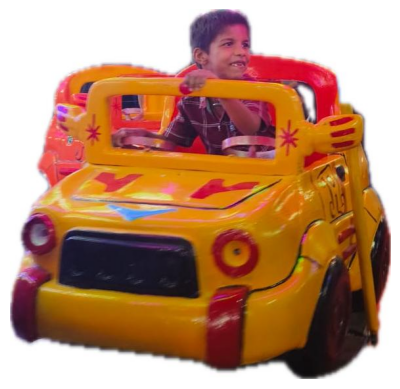

In [6]:
# converting BGR -> RGB
newImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(newImg)
plt.axis("off")
plt.show()

## Video Input from WebCam

In [21]:
# craete  camera object
cam = cv2.VideoCapture(0)

In [22]:
# read image from camera object
success, img = cam.read()

if not success:
    print("Reading camera failed")

cv2.imshow("Image window", img)

# cv2 waitingkwy to show the image for given secs
cv2.waitKey(1000)

-1

In [26]:
# reading video as a series of images
counter = 200
while counter>0:
    success, img = cam.read()
    if not success:
        print("Not able to read")
    cv2.imshow("Image window", img)
    cv2.waitKey(1)
    counter-=1

In [27]:
# to stop cam
cam.release()

: 

## Object Detection using Haarcascades

* Haar cascades are fast and work well in real-time
* Haar cascade is not as accurate as modern object detection techniques are
* Haar cascade has a downside, many false positives
* Simple to implement, less computing power required

In [32]:
img = cv2.imread("images/people.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [33]:
model = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [34]:
# method that uses to find the face
faces = model.detectMultiScale(img, 1.3,1)

# to get the pixels cordinates
faces

array([[ 48,  62,  23,  23],
       [ 92,  67,  25,  25],
       [308,  22,  25,  25],
       [114,  38,  24,  24],
       [480,  84,  23,  23],
       [ 83,  42,  22,  22],
       [268,  41,  27,  27],
       [485,  43,  26,  26],
       [258,  93,  24,  24],
       [320,  56,  29,  29],
       [526,  56,  30,  30],
       [ 72,  17,  74,  74],
       [ 61, 146,  29,  29],
       [187, 152,  22,  22],
       [ 44, 173,  26,  26],
       [223, 152,  26,  26],
       [282, 176,  25,  25],
       [100, 163,  26,  26],
       [186, 200,  26,  26],
       [214, 199,  28,  28],
       [323, 174,  30,  30],
       [143, 184,  37,  37],
       [181, 145,  34,  34],
       [138,  74,  23,  23],
       [162,  76,  23,  23],
       [232,  75,  26,  26]], dtype=int32)

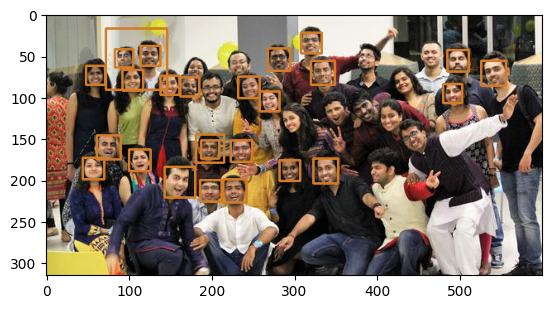

In [39]:
# to ploting the faces
for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x,y), (x+w, y+h), (211, 123, 38), 2)

plt.imshow(img)


# Face Detection in Live Video

In [3]:
# creating the cam object
cam = cv2.VideoCapture(0)

# importing the model
model = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

# read images -> video
while True:
    success, img = cam.read()

    if not success:
        print("Reading camera failed")

    # detect faces
    faces = model.detectMultiScale(img, 1.3, 1)

    # draw boundry boxes
    for face in faces:
        x, y, w, h = face 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # to show the image
    cv2.imshow("Image Window", img)
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

# to close the cam object
cam.release()
cv2.destroyAllWindows()